In [1]:
# Copyright (c) 2020 ETH Zurich, Xiaying Wang, Michael Hersche, Michele Magno, and Luca Benini

In [1]:
%matplotlib inline
import matplotlib as plt
import matplotlib.pyplot as plt
from matplotlib import ticker
plt.rc('axes', axisbelow=True)
import numpy as np
import os

plt.rcParams.update({'font.size': 22})

import matplotlib2tikz

/usr/scratch/bismantova/xiaywang/software/anaconda3/envs/mybciEnv/lib/python3.6/site-packages/matplotlib2tikz/__init__.py:31: UserWarning: matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.
  warnings.warn("matplotlib2tikz has been renamed to tikzplotlib (which is Python-3-only). matplotlib2tikz will no longer be supported.")


In [26]:
num_classes=2
modelname = "" # put "eegnet_" for plotting for eegnet
# remember to change experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds'
saveplot = False

In [12]:
# plot global model results 
def plot_channels_acc(path,num_classes,n_ds,n_ch_list,T, n_epochs, same_folds=False, log=False,equi=False, dataset='bci'):
    
    if dataset=='bci':
        csvfnamecs = 'bci_class_{:}_ds{:}_nch{:}cs_T{}_split_{:}.csv'
        csvfname = 'bci_class_{:}_ds{:}_nch{:}_T{}_split_{:}.csv'
    else:    
        csvfnamecs = 'global_class_{:}_ds{:}_nch{:}cs_T{}_split_{:}.csv'
        csvfname = 'global_class_{:}_ds{:}_nch{:}_T{}_split_{:}.csv'
    
    train_acc=[]
    val_acc=[]
    #n_ch_list.sort()
    for n_ch in n_ch_list:
    
        all_acc = np.zeros((5,4,n_epochs))
        for split_ctr in range(5):
            if same_folds:
                file = f'{path}/stats/{csvfnamecs.format(num_classes,n_ds,n_ch,T,split_ctr)}'
            else:
                file = f'{path}/stats/{csvfname.format(num_classes,n_ds,n_ch,T,split_ctr)}'
            #print(all_acc.shape)
            all_acc[split_ctr] = np.transpose(np.genfromtxt(file, delimiter=' '))
        
        train_acc.append(100*all_acc[:,0,-1].mean())
        val_acc.append(100*all_acc[:,1,-1].mean())

    fig, ax = plt.subplots(figsize=(18,8))
    if equi:
        equix = np.arange(len(n_ch_list))
        ax.xaxis.set_ticks(equix) #set the ticks to be a
        ax.xaxis.set_ticklabels(n_ch_list) # change the ticks' names to x
        plt.plot(equix, train_acc,linewidth=2,label = 'Train Acc', marker='o', ls='dotted', markersize=10)
        plt.plot(equix, val_acc,linewidth=2,label = 'Val Acc', marker='^',ls='dotted', markersize=10)
    else:
        if log:
            plt.xscale('log')
            ax.xaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))
        plt.plot(n_ch_list, train_acc,linewidth=1,label = 'Train Acc', marker='o',ls='dotted')
        plt.plot(n_ch_list, val_acc,linewidth=2,label = 'Val Acc', marker='^',ls='dotted')
        plt.xticks(n_ch_list, n_ch_list)
    plt.legend()
    plt.grid(True)
    
    return train_acc, val_acc

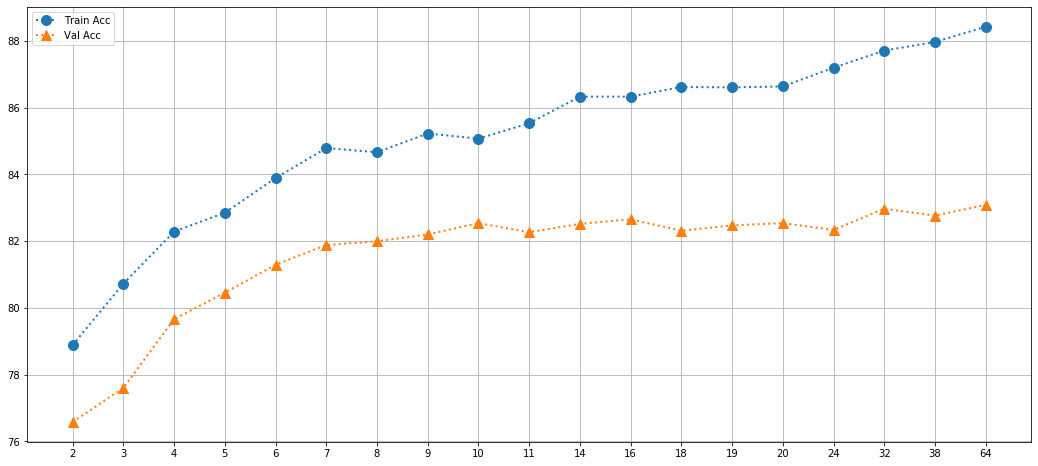

In [28]:
experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds-1'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = [2, 3, 5, 7, 9, 11, 4, 6, 10, 14, 18, 20, 8, 19, 38, 64, 16, 24, 32]
n_ch.sort()
T = 3
#num_classes = 2

_, val_acc = plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,100,same_folds=1, equi=True)

In [29]:
val_acc

[76.57596371882087,
 77.59637188208616,
 79.65986394557824,
 80.45351473922902,
 81.29251700680274,
 81.88208616780045,
 81.99546485260771,
 82.19954648526077,
 82.53968253968254,
 82.26757369614512,
 82.51700680272108,
 82.6530612244898,
 82.31292517006803,
 82.47165532879819,
 82.53968253968253,
 82.33560090702946,
 82.97052154195012,
 82.76643990929706,
 83.08390022675735]

In [30]:
# saved the headset accuracies from headphone_arrangement.ipynb from Michael's plot_nbook

# acc_dict = {'center': np.stack((nch_list_center, acc_gl_center)), 'front': np.stack((nch_list_front, acc_gl_front)), 'back': np.asarray([nch_list_back, acc_gl_back])}
# acc_dict

# npy_file = "../../../../../../../xiaywang/Projects/BCI/memea_extension/eegnet-based-embedded-bci/plot_nbook/headset_acc_{:}class.npy".format(num_classes)

# np.save(npy_file,  acc_dict)    

# my_dict_back = np.load(npy_file)

# print(my_dict_back.item().keys())    
# print(my_dict_back.item().get('center'))

In [31]:
np.__version__

'1.18.1'

In [32]:
npy_file = './plots/channels_acc_plots/{}headset_acc_{:}class.npy'.format(modelname, num_classes)

acc_dict_headset = np.load(npy_file, allow_pickle=True)

#print(acc_dict_headset.item().keys())    
#print(acc_dict_headset.item().get('center'))

nch_list_center = acc_dict_headset.item().get('center')[0]
acc_gl_center = acc_dict_headset.item().get('center')[1]

nch_list_front = acc_dict_headset.item().get('front')[0]
acc_gl_front = acc_dict_headset.item().get('front')[1]

nch_list_back = acc_dict_headset.item().get('back')[0]
acc_gl_back = acc_dict_headset.item().get('back')[1]

In [33]:
savepath = './plots/channels_acc_plots/'

/usr/scratch/bismantova/xiaywang/software/anaconda3/envs/eegnet/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Saw kwargs ['lw', 'linewidth'] which are all aliases for 'linewidth'.  Kept value from 'linewidth'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  import sys
/usr/scratch/bismantova/xiaywang/software/anaconda3/envs/eegnet/lib/python3.7/site-packages/matplotlib2tikz/axes.py:508: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.get_visible instead.
  major_ticks_bottom = [tick.tick1On for tick in major_ticks]
/usr/scratch/bismantova/xiaywang/software/anaconda3/envs/eegnet/lib/python3.7/site-packages/matplotlib2tikz/axes.py:509: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.get_visible instead.
  major_ticks_top = [tick.tick2On for tick in major

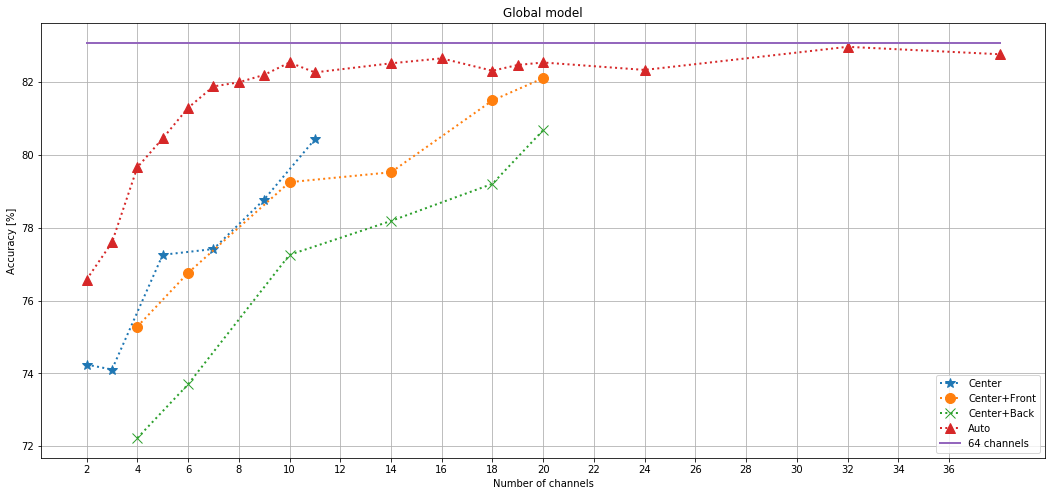

In [38]:
# plot all lines 

fig, ax = plt.subplots(figsize=(18,8))
plt.plot(nch_list_center[:-1],acc_gl_center[:-1], '*:', label="Center", markersize=10, lw=2)
plt.plot(nch_list_front,acc_gl_front, 'o:', label="Center+Front", markersize=10, lw=2)
plt.plot(nch_list_back, acc_gl_back, 'x:', label="Center+Back", markersize=10, lw=2) #, markeredgewidth=2)
plt.plot(n_ch[:-1], val_acc[:-1],linewidth=2,label = 'Auto', marker='^',ls='dotted', markersize=10, lw=2)
plt.plot([2,max(n_ch[:-1])],[val_acc[-1],val_acc[-1]], label="64 channels", lw=2)
plt.ylabel("Accuracy [%]")
plt.xlabel("Number of channels")
plt.grid()
plt.title("Global model")

plt.xticks(np.arange(2,max(n_ch[:-1]),2))
plt.legend()


matplotlib2tikz.save(os.path.join(savepath, "{}all_{:}class-1.tex".format(modelname, num_classes)))

if saveplot:
    plt.savefig(os.path.join(savepath, "{}all_{:}class-1.pdf".format(modelname, num_classes)), bbox_inches='tight')

In [35]:
print(nch_list_center[:-1],acc_gl_center[:-1])
print(nch_list_front,acc_gl_front)
print(nch_list_back, acc_gl_back)
print(n_ch[:-1], val_acc[:-1])
print([2,max(n_ch[:-1])],[val_acc[-1],val_acc[-1]])

n_ch = [2, 3, 5, 7, 9, 11, 4, 6, 10, 14, 18, 20, 8, 19, 38, 64, 16, 24, 32]
n_ch.sort()
print(n_ch)

[ 2.  3.  5.  7.  9. 11.] [74.24036281 74.10430839 77.25623583 77.41496599 78.7755102  80.430839  ]
[ 4.  6. 10. 14. 18. 20.] [75.28344671 76.75736961 79.25170068 79.52380952 81.49659864 82.10884354]
[ 4.  6. 10. 14. 18. 20.] [72.22222222 73.69614512 77.25623583 78.18594104 79.20634921 80.68027211]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 18, 19, 20, 24, 32, 38] [76.57596371882087, 77.59637188208616, 79.65986394557824, 80.45351473922902, 81.29251700680274, 81.88208616780045, 81.99546485260771, 82.19954648526077, 82.53968253968254, 82.26757369614512, 82.51700680272108, 82.6530612244898, 82.31292517006803, 82.47165532879819, 82.53968253968253, 82.33560090702946, 82.97052154195012, 82.76643990929706]
[2, 38] [83.08390022675735, 83.08390022675735]
[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 14, 16, 18, 19, 20, 24, 32, 38, 64]


In [36]:
import matplotlib2tikz

matplotlib2tikz.save(os.path.join(savepath, "{}all_{:}class-1.tex".format(modelname, num_classes)))

<Figure size 432x288 with 0 Axes>

In [37]:
#all_acc_dict = {"Auto": all_acc, "Center": all_acc, "Center+Front": all_acc, "Center+Back": all_acc}
all_acc_dict = {}

# for headset Center electrodes
all_acc = np.empty((2, len(n_ch)))
all_acc[:] = np.NaN
xy, x_ind, y_ind = np.intersect1d(nch_list_center, n_ch, return_indices=True)
xy, x_ind, y_ind
np.put(all_acc[0, :], y_ind, nch_list_center)
np.put(all_acc[1, :], y_ind, acc_gl_center)
all_acc_dict['Center'] = all_acc

# for headset Center+Front electrodes
all_acc = np.empty((2, len(n_ch)))
all_acc[:] = np.NaN
xy, x_ind, y_ind = np.intersect1d(nch_list_front, n_ch, return_indices=True)
xy, x_ind, y_ind
np.put(all_acc[0, :], y_ind, nch_list_front)
np.put(all_acc[1, :], y_ind, acc_gl_front)
all_acc_dict['Center+Front'] = all_acc

# for headset Center+Back electrodes
all_acc = np.empty((2, len(n_ch)))
all_acc[:] = np.NaN
xy, x_ind, y_ind = np.intersect1d(nch_list_back, n_ch, return_indices=True)
xy, x_ind, y_ind
np.put(all_acc[0, :], y_ind, nch_list_back)
np.put(all_acc[1, :], y_ind, acc_gl_back)
all_acc_dict['Center+Back'] = all_acc

# for automatic channel selection using network weights
all_acc = np.empty((2, len(n_ch)))
all_acc[:] = np.NaN
all_acc[0, :] = n_ch
all_acc[1, :] = val_acc
all_acc_dict['Auto']=all_acc

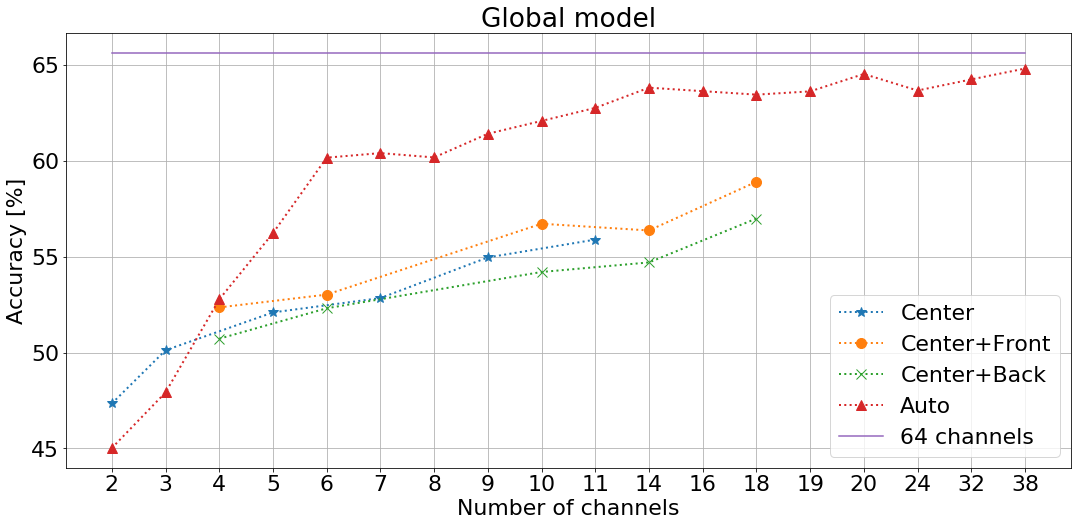

In [225]:
fig, ax = plt.subplots(figsize=(18,8))
markertype={'Center':'*:', 'Center+Front':'o:', 'Center+Back':'x:', 'Auto':'^:'}
equix = np.arange(len(n_ch))
ax.xaxis.set_ticks(equix) #set the ticks to be a
ax.xaxis.set_ticklabels(n_ch) # change the ticks' names to x
#plt.ylim([50,90])
for key in all_acc_dict.keys():
    channels = all_acc_dict[key][0]
    accuracies = all_acc_dict[key][1]
    accuracies = accuracies[~np.isnan(accuracies)]
    plt.plot(np.argwhere(np.isfinite(channels))[:-1],accuracies[:-1], markertype[key], label=key, markersize=10, lw=2)
plt.plot([0,equix[-2]],[val_acc[-1],val_acc[-1]], label="64 channels")
plt.ylabel("Accuracy [%]")
plt.xlabel("Number of channels")
plt.grid()
plt.title("Global model")
plt.legend()

if saveplot:
    plt.savefig(os.path.join(savepath, "{}all_{:}class_setxlabels-1.pdf".format(modelname, num_classes)), bbox_inches='tight')

([63.69614512471655, 66.8140589569161, 69.14399092970521, 70.4875283446712],
 [62.13151927437642, 63.650793650793645, 64.875283446712, 65.63492063492063])

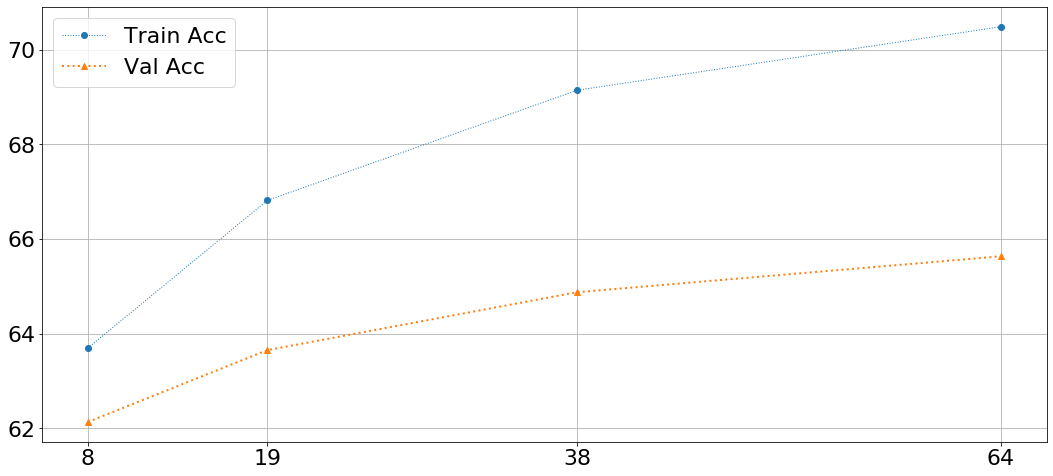

In [91]:
experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = [8, 19, 38, 64]
T = 3
num_classes = 4

plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,100,same_folds=1, log=False)

([62.24489795918367, 67.01530612244898, 69.49263038548754, 70.31179138321995],
 [60.464852607709766, 64.54648526077096, 64.98866213151928, 65.6575963718821])

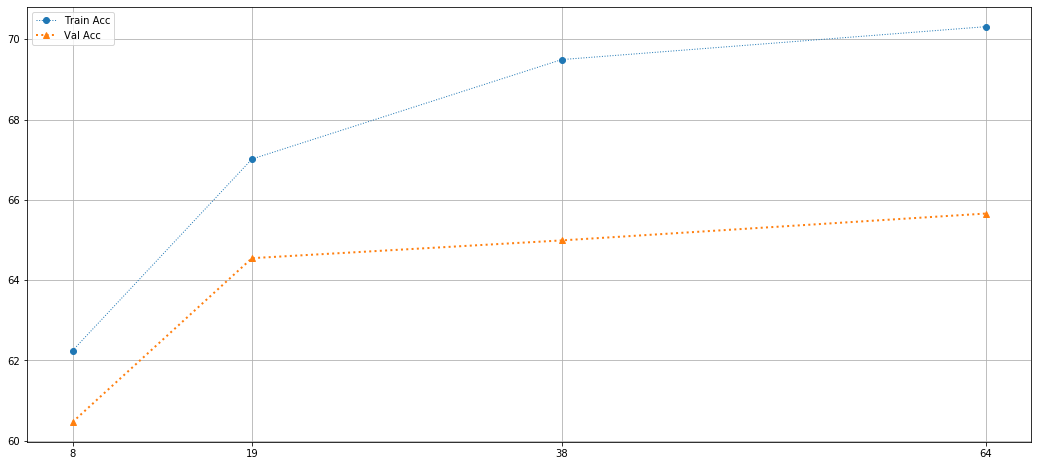

In [15]:
experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds-unitNorm'
result_path = '../results/'+experiment_name
n_ds = 1
n_ch = [8, 19, 38, 64]
T = 3
num_classes = 4

plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,100,same_folds=1, log=False)

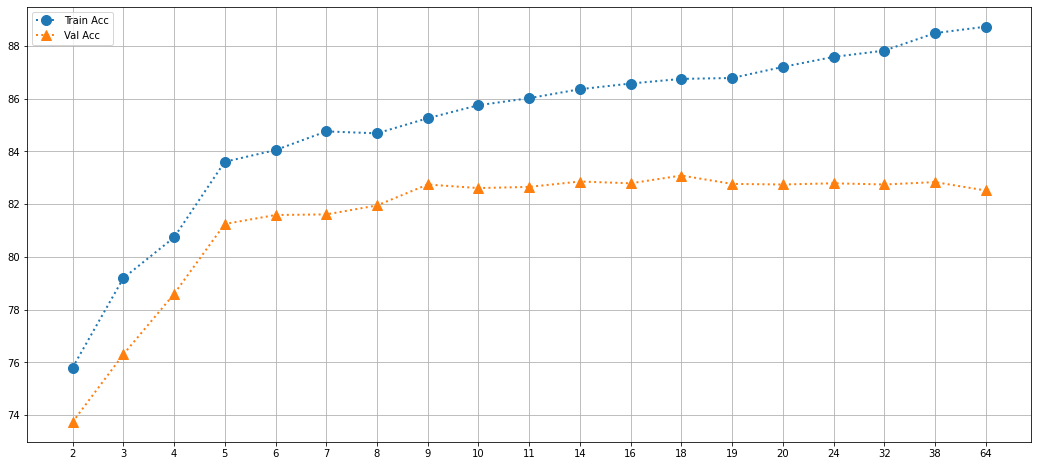

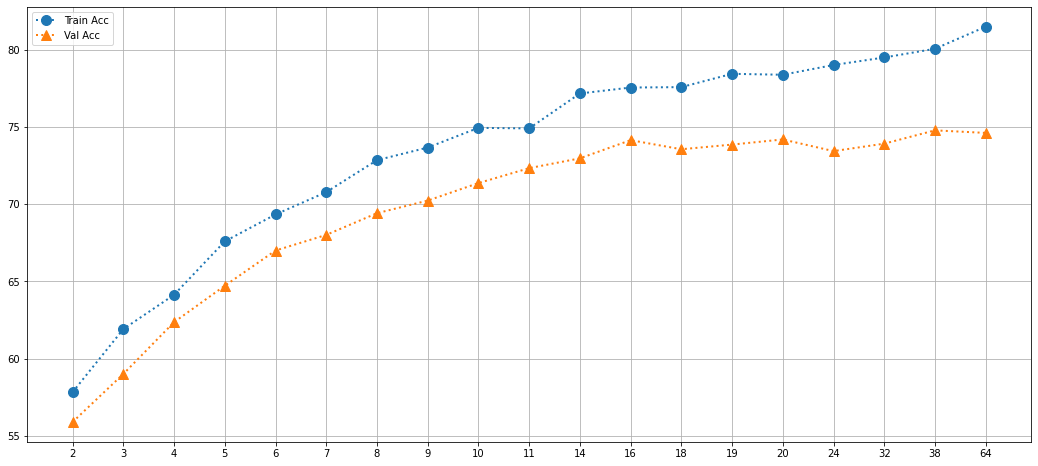

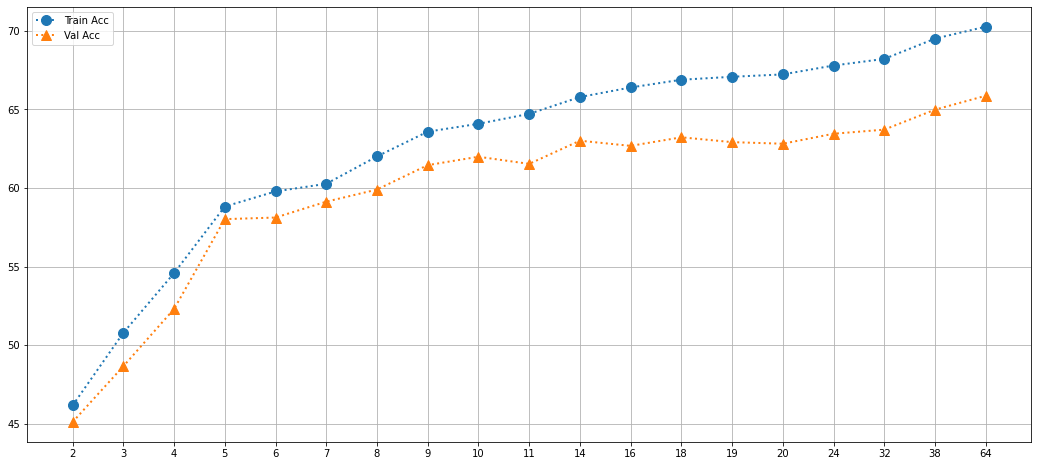

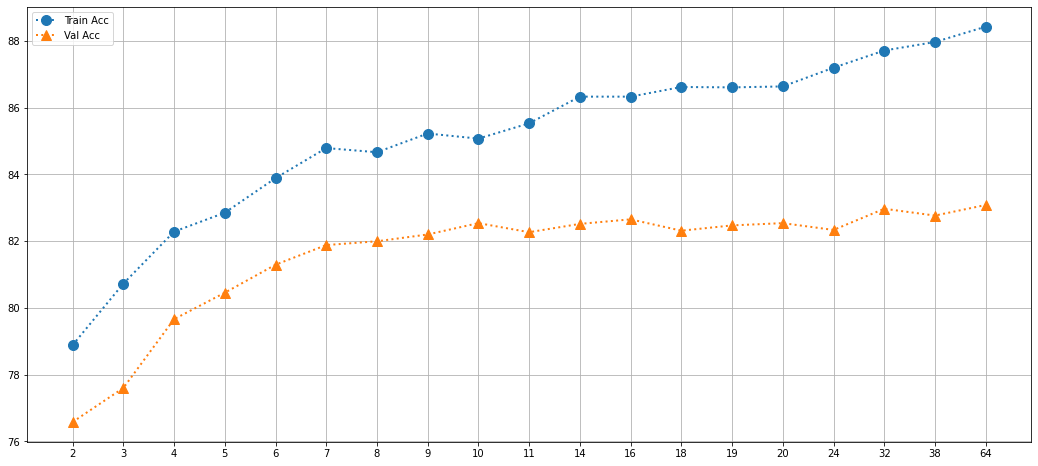

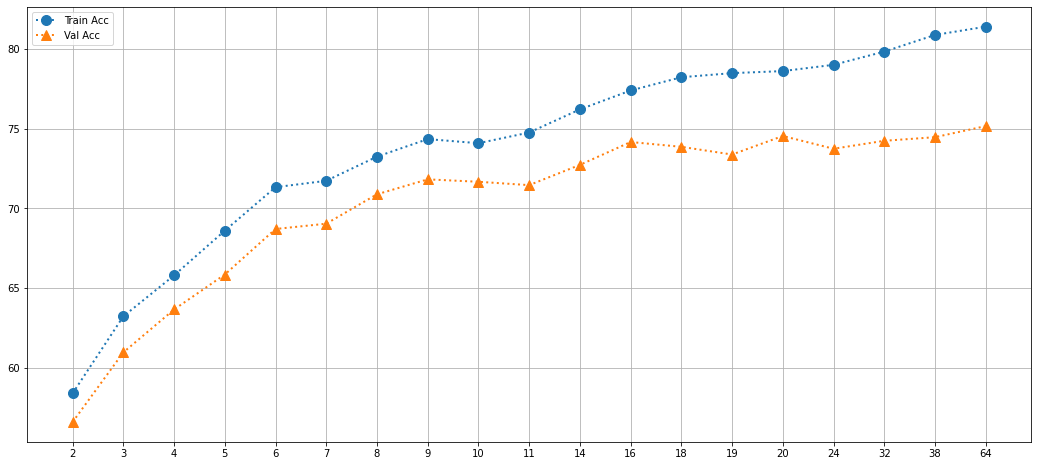

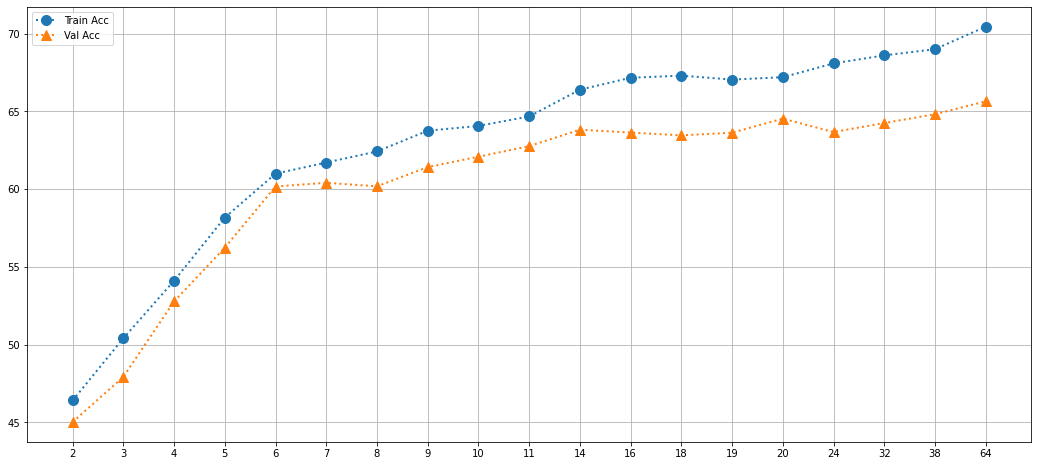

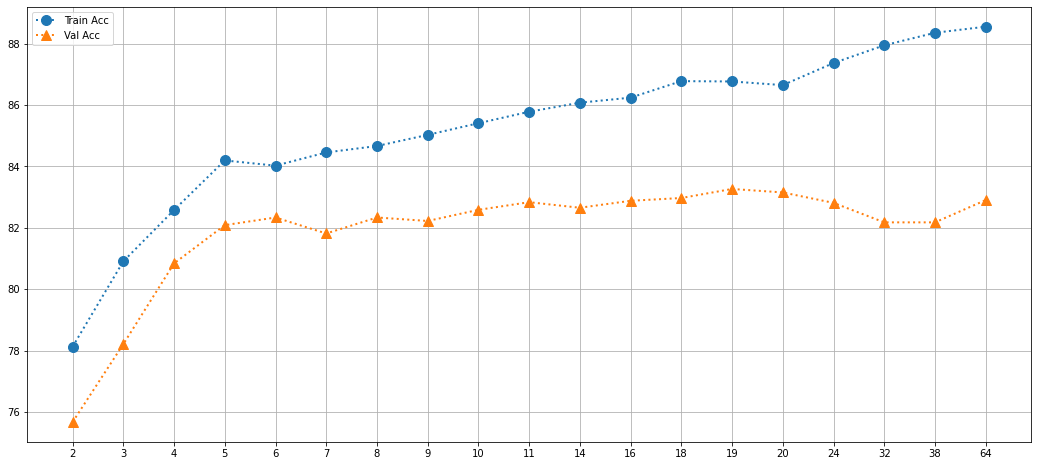

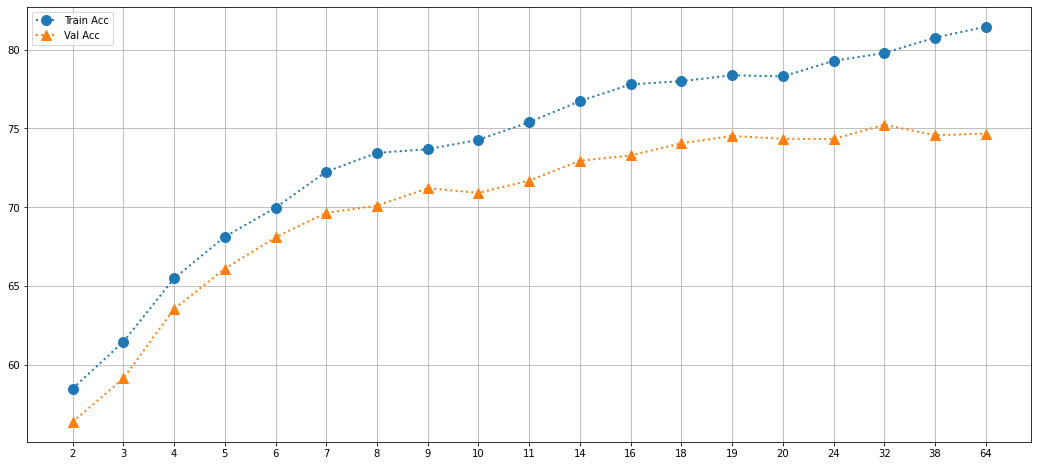

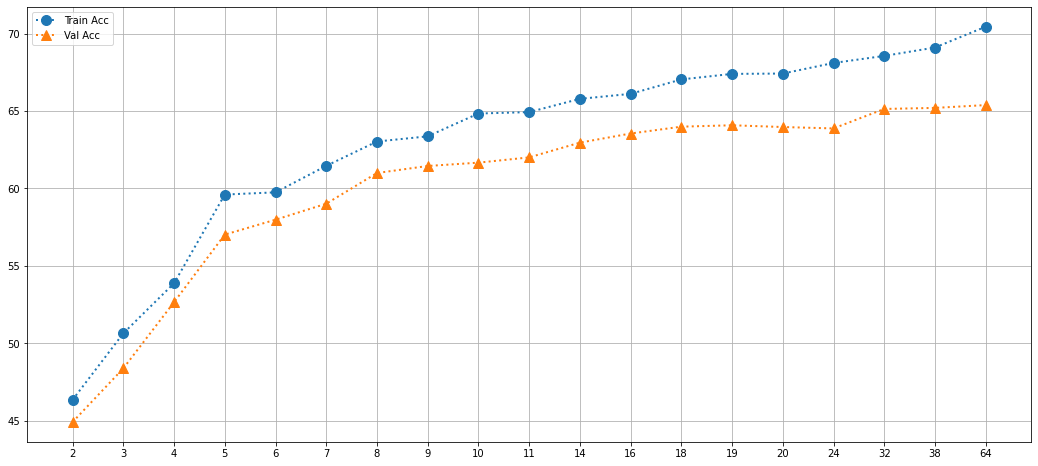

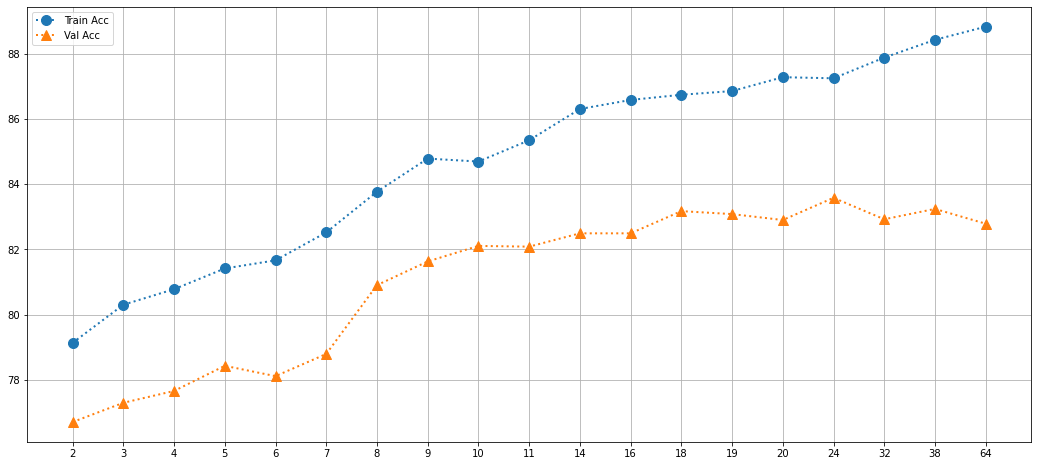

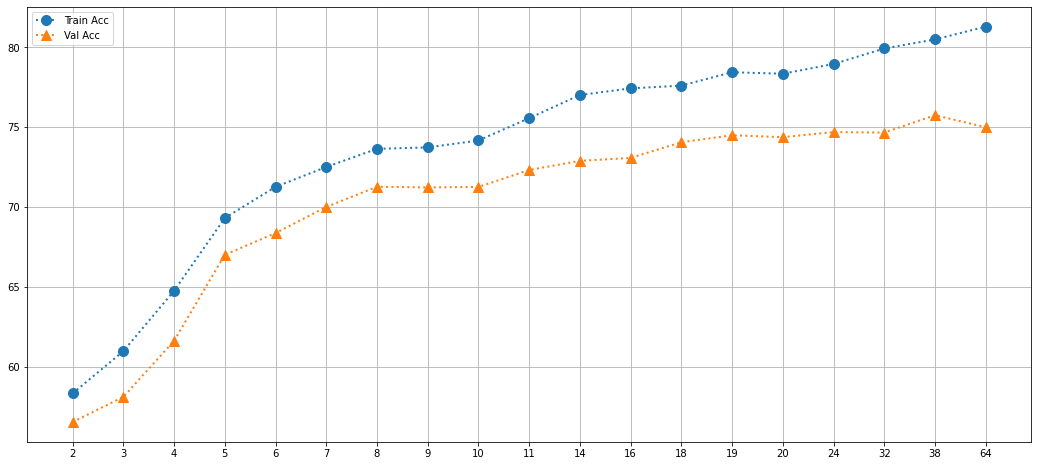

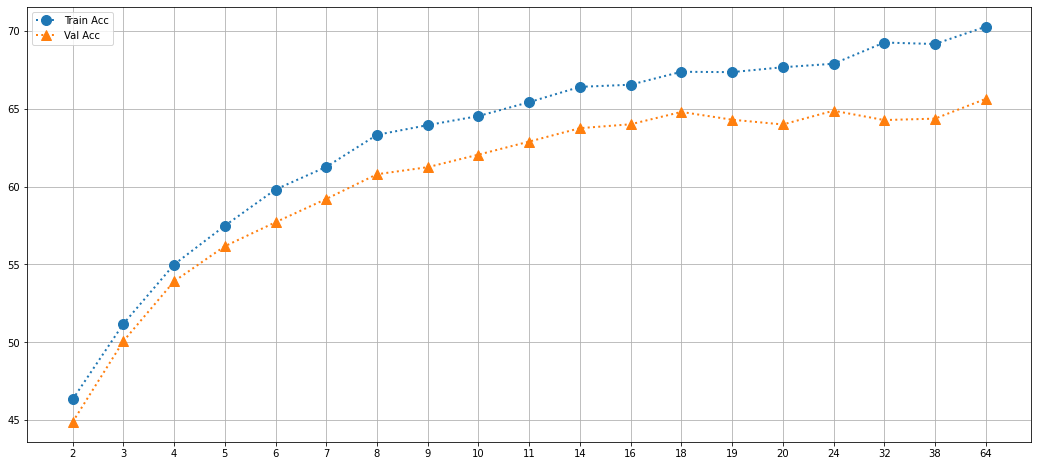

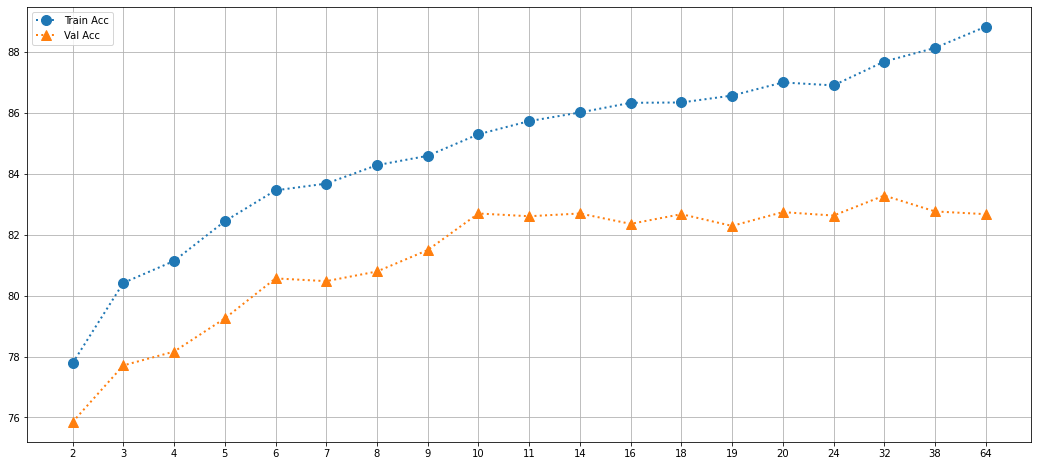

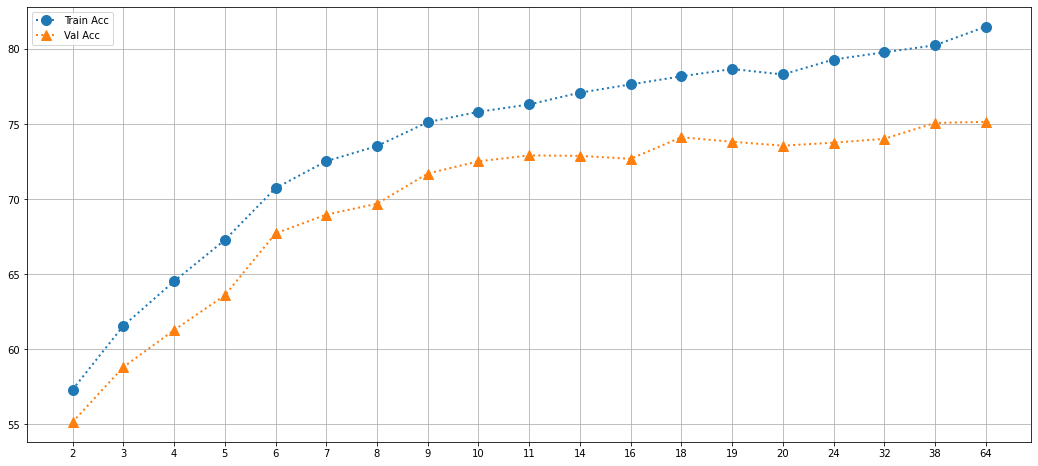

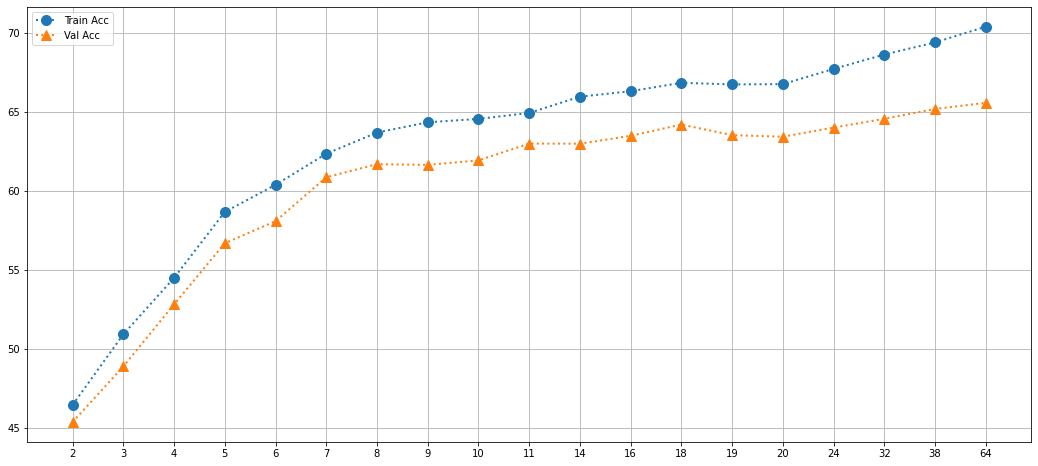

In [32]:
n_ch = [2, 3, 5, 7, 9, 11, 4, 6, 10, 14, 18, 20, 8, 19, 38, 64, 16, 24, 32] # for physionet
#n_ch = [2, 3, 5, 7, 8, 9, 11, 4, 6, 10, 14, 18, 19, 20, 16, 22]
n_ch.sort()
n_ds = 1
dataset='physionet'
if dataset == 'bci':
    T = 0
    n_classes = [4]
    n_epochs = 500
else:
    T=3
    n_classes = [2,3,4]
    n_epochs = 100


stats = np.zeros((5, len(n_classes), len(n_ch))) # runs, classes, n_ch

experiment_name = 'global-experiment-cubeedgeEEGNet-weights-same-folds-{}'
#experiment_name = 'bci-cubeedgeEEGNet-weights-same-subj-{}'

for b in range(5):
    result_path = '../results/'+experiment_name.format(b)
    for c, num_classes in enumerate(n_classes):
        _, val_acc = plot_channels_acc(result_path,num_classes,n_ds,n_ch,T,n_epochs,same_folds=1, equi=True, dataset=dataset)

        stats[b, c, :] = val_acc

    

In [33]:
acc_mean = np.mean(stats, axis=0)
for c in range(len(n_classes)):
    for ch in range(len(n_ch)):
        print(f'{n_ch[ch]} {acc_mean[c,ch]}')
    print('\n\n')
    #numpy_data = np.concatenate((n_ch, acc_mean[c]), axis=0)
    #df = pd.DataFrame(data=numpy_data)

2 75.70975056689342
3 77.42403628117913
4 78.98412698412699
5 80.29478458049887
6 80.78004535147393
7 80.91609977324262
8 81.59637188208617
9 82.05895691609979
10 82.50793650793652
11 82.48979591836735
14 82.64399092970521
16 82.63492063492063
18 82.84353741496598
19 82.77551020408164
20 82.81632653061224
24 82.82993197278911
32 82.82086167800455
38 82.75736961451247
64 82.7936507936508



2 56.111866975317184
3 59.207860928183685
4 62.49433107404932
5 65.45427060334501
6 67.97883598541367
7 69.13681028507374
8 70.27664399372297
9 71.24111867843031
10 71.54950869551952
11 72.14512472141898
14 72.88888889348428
16 73.47543462622103
18 73.93499622872987
19 74.01965231086301
20 74.20710507100583
24 73.99546485693277
32 74.41874528327678
38 74.93272865386237
64 74.92365835844706



2 45.058956916099774
3 48.78458049886622
4 52.89115646258504
5 56.82312925170068
6 58.410430839002274
7 59.72108843537414
8 60.70975056689342
9 61.439909297052154
10 61.941043083900226
11 62.43537414965986
14 63